# Further feature engineering

Running this notebook requires lightgbm and mlxtend to be installed.

In [1]:
# importing functions
%run helper_functions.ipynb

### Prior transformation of data
* Adding calculated values (calculated in Data preparation.ipynb)
* Engineering new features from spacegroup
* Filling missing values
* Applying log-transformation to some features *("cAlGa", "cAlIn", "cGaAl", "cInAl", "cInGa", "distAlO", "distGaAl", "distGaIn", "distGaO", "distInAl", "distInGa", "distInO", "spacegroup")*
* Standardizing

These are done in helper_functions.ipynb

### Setting baseline

#### Formation energy

In [2]:
from lightgbm import LGBMRegressor
params_fe = {
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":90,
    "num_leaves": 15}
lgbm_fe = LGBMRegressor(**params_fe)
print("CV score:", evaluate_CV(lgbm_fe, X_full, y_fe))
print("CV score with log-transformation on target:",evaluate_CV(lgbm_fe, X_full, np.log1p(y_fe), metric=rmsle_scorer_exp))

CV score: 0.031066445223411267
CV score with log-transformation on target: 0.030964303938499287


#### Bandgap energy

In [3]:
params_be = {"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20}
lgbm_be = LGBMRegressor(**params_be)
print("CV score:", evaluate_CV(lgbm_be, X_full, y_be))
print("CV score with log-transformation on target:", evaluate_CV(lgbm_be, X_full, np.log1p(y_be), metric=rmsle_scorer_exp))

CV score: 0.08758422696536297
CV score with log-transformation on target: 0.08727756650641322


In [4]:
# for submitting to Kaggle
#lgbm_be.fit(X_full, np.log1p(y_be))
#lgbm_fe.fit(X_full, np.log1p(y_fe))
#save_results(np.expm1(lgbm_fe.predict(X_full_test)), np.expm1(lgbm_be.predict(X_full_test)), "baseline")

Baseline kaggle private score: 0.06645

### Using PCA

Here I will test if using PCA will give any benefit.

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
cols =['lattice_vector_1_ang', 'lattice_vector_2_ang', 'lattice_vector_3_ang']
pca.fit(X_full[cols])
X_full["pca_lattice_vector"] = pca.transform(X_full[cols])
pca.fit(X_full_test[cols])
X_full_test["pca_lattice_vector"] = pca.transform(X_full_test[cols])

In [6]:
pca = PCA(n_components=1)
cols=['lattice_angle_alpha_degree', 'lattice_angle_beta_degree', 'lattice_angle_gamma_degree']
pca.fit(X_full[cols])
X_full["pca_lattice_angle"] = pca.transform(X_full[cols])
X_full_test["pca_lattice_angle"] = pca.transform(X_full_test[cols])

In [7]:
pca = PCA(n_components=1)
cols=['distAlGa','distAlIn', 'distAlO', 'distGaAl', 'distGaIn', 'distGaO', 'distInAl','distInGa', 'distInO']
pca.fit(X_full[cols])
X_full["pca_c_el"] = pca.transform(X_full[cols])
X_full_test["pca_c_el"] = pca.transform(X_full_test[cols])

In [8]:
from lightgbm import LGBMRegressor
params_fe = {
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":90,
    "num_leaves": 15}
lgbm_fe = LGBMRegressor(**params_fe)
print("CV score:",evaluate_CV(lgbm_fe, X_full, y_fe))
print("CV score with log-transformation on target:", evaluate_CV(lgbm_fe, X_full, np.log1p(y_fe), metric=rmsle_scorer_exp))

CV score: 0.030744992744092387
CV score with log-transformation on target: 0.03084004163630935


In [9]:
params_be = {"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20}
lgbm_be = LGBMRegressor(**params_be)
print("CV score:",evaluate_CV(lgbm_be, X_full, y_be))
print("CV score with log-transformation on target:",evaluate_CV(lgbm_be, X_full, np.log1p(y_be), metric=rmsle_scorer_exp))

CV score: 0.08715000925740105
CV score with log-transformation on target: 0.08677325468186294


### Dropping columns

Testing if dropping any columns will give a better score.

In [10]:
lgbm_be = LGBMRegressor(**params_be)
baseline = evaluate_CV(lgbm_be, X_full, y_be) 
print("baseline:", baseline)
for col in X_full.columns:
    new_score = evaluate_CV(lgbm_be, X_full.drop(col,axis=1), y_be)
    if baseline > new_score:
        print(col, new_score)

baseline: 0.08715000925740105
percent_atom_al 0.08621065106284617
percent_atom_ga 0.086415160363865
lattice_vector_1_ang 0.0868712784667651
lattice_vector_2_ang 0.08586715437593839
lattice_vector_3_ang 0.08700375247938721
lattice_angle_alpha_degree 0.0869579113060174
lattice_angle_beta_degree 0.08695994474613063
cAlAl 0.08705987928697848
cAlGa 0.0866104975587514
cAlIn 0.08678722837191286
cAlO 0.08680073863465923
cGaAl 0.0869645283264347
cGaGa 0.08679901138522597
cGaIn 0.08711655051669535
cGaO 0.08689612905066052
cInAl 0.08648972206992461
cInGa 0.08674504211638843
cInIn 0.08713715137765658
distAlAl 0.08682884426837939
distAlIn 0.08697349966879409
distAlO 0.08688603557769445
distGaGa 0.08694167168861149
distGaIn 0.08683990153098789
distInGa 0.08685202560294314
distInIn 0.08710651750246226
distInO 0.08707136174234235
qAl 0.08714778473557874
qGa 0.08711455715587571
qIn 0.0870801054813535
pca_lattice_vector 0.08654929560908897
pca_lattice_angle 0.08704129320860352
pca_c_el 0.086815698913190

In [11]:
lgbm_be = LGBMRegressor(**params_be)
cols_to_drop = ["pca_lattice_vector", "cAlIn"]
print(evaluate_CV(lgbm_be, X_full.drop(cols_to_drop, axis=1), y_be))
print(evaluate_CV(lgbm_be, X_full.drop(cols_to_drop, axis=1), np.log1p(y_be), metric=rmsle_scorer_exp))

0.08633234653505777
0.08597707489194743


In [12]:
lgbm_fe = LGBMRegressor(**params_fe)
baseline = evaluate_CV(lgbm_fe, X_full, y_fe) 
print("baseline:", baseline)
for col in X_full.columns:
    new_score = evaluate_CV(lgbm_fe, X_full.drop(col,axis=1), y_fe)
    if baseline > new_score:
        print(col, new_score)

baseline: 0.030744992744092387
number_of_total_atoms 0.03072434295835206
percent_atom_al 0.030698050909873827
lattice_angle_beta_degree 0.030653174631601693
Vatom 0.030562221893803365
cAlGa 0.03073695975675498
cAlIn 0.03052625300882798
cGaAl 0.03069949281489056
cGaGa 0.030717432032607943
cGaIn 0.030717932812683264
cGaO 0.03074184269705485
cInAl 0.030603244347125347
cInIn 0.03071828813673763
distGaO 0.030721962661226863
qAl 0.030738007735953615
qO 0.030713420362384263
centroSym 0.03073249927157435


In [13]:
lgbm_fe = LGBMRegressor(**params_fe)
cols_to_drop = ["cAlIn", "cInAl"]
print(evaluate_CV(lgbm_fe, X_full.drop(cols_to_drop, axis=1), y_fe))
print(evaluate_CV(lgbm_fe, X_full.drop(cols_to_drop, axis=1), np.log1p(y_fe), metric=rmsle_scorer_exp))

0.03008359331808047
0.030236627563077028


In [14]:
X_full_be = X_full.drop(["cAlIn"], axis=1)
X_full_fe = X_full.drop(["cAlIn", "cInAl"], axis=1)
X_full_test_be = X_full_test.drop(["cAlIn"], axis=1)
X_full_test_fe = X_full_test.drop(["cAlIn", "cInAl"], axis=1)

In [15]:
# saving results for kaggle
#lgbm_be.fit(X_full_be, np.log1p(y_be))
#lgbm_fe.fit(X_full_fe, np.log1p(y_fe))
#save_results(np.expm1(lgbm_fe.predict(X_full_test_fe)), np.expm1(lgbm_be.predict(X_full_test_be)), "removal + pca")

Kaggle private score without pca: 0.06631

Kaggle private score with pca: 0.06681

**We can conclude that PCA didn't help us achieve better results for the test dataset. Dropping certain columns will be beneficial.**

# Training a stacked model

## Reloading the dataset before continuing

In [16]:
# reset features
%run helper_functions.ipynb
useless_cols = ['cAlAl', 'cInIn', 'cGaGa', 'distAlAl', 'distInIn', 'distGaGa']
X_full.drop(useless_cols, axis=1, inplace=True)
X_full_test.drop(useless_cols, axis=1, inplace=True)
X_full_be = X_full.drop(["cAlIn"], axis=1)
X_full_fe = X_full.drop(["cAlIn", "cInAl"], axis=1)
X_full_test_be = X_full_test.drop(["cAlIn"], axis=1)
X_full_test_fe = X_full_test.drop(["cAlIn", "cInAl"], axis=1)


## Parameter tuning

Tuning some additional models for the 2-level regressor.

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
def param_search(model, grid, fe=True, transform_target=True):
    gs = GridSearchCV(model, grid, n_jobs=-1, scoring=(rmsle_scorer_exp if transform_target else rmsle_scorer), cv=3)
    target = (y_fe if fe else y_be)
    gs.fit(X_full_fe if fe else X_full_be , np.log1p(target) if transform_target else target)
    print(f"best score: {gs.best_score_}")
    print(f"best params: {gs.best_params_}")
    return gs.best_params_
    

In [20]:

model = Ridge()
grid = {
    "alpha":[0.0001,0.005,0.01,0.05,0.1,0.5,1,1.5,2,2.5],
    "random_state": [3]
}

ridge_params_be = param_search(model, grid, fe=False, transform_target=True)

ridge_params_fe = param_search(model, grid, fe=True, transform_target=True)


best score: -0.09422746032504561
best params: {'alpha': 0.0001, 'random_state': 3}
best score: -0.048699034134887395
best params: {'alpha': 2, 'random_state': 3}


In [21]:
model = ExtraTreesRegressor()
grid = {
    "n_estimators":[100,150,200,250],
    "max_depth":[None,10,12,15],
    "bootstrap":[True, False],
    "random_state": [3]
}

et_params_be = param_search(model, grid, fe=False, transform_target=True)
et_params_fe = param_search(model, grid, fe=True, transform_target=True)

best score: -0.08842670471149945
best params: {'bootstrap': True, 'max_depth': 12, 'n_estimators': 200, 'random_state': 3}
best score: -0.02924787537074349
best params: {'bootstrap': True, 'max_depth': None, 'n_estimators': 250, 'random_state': 3}


In [22]:
# without the added parameters
et_params_fe={'bootstrap': True, 'max_depth': None, 'n_estimators': 250, 'random_state': 3}
et_fe = ExtraTreesRegressor(**et_params_fe)
params_be = {"boosting_type": "gbdt","max_depth": 5,"learning_rate": 0.12,"n_estimators":100,"num_leaves": 20}
lgbm_be = LGBMRegressor(**params_be)

# This is for kaggle
#lgbm_be.fit(X_full_be, np.log1p(y_be))
#et_fe.fit(X_full_fe, np.log1p(y_fe))
# save_results(np.expm1(et_fe.predict(X_full_test_fe)), np.expm1(lgbm_be.predict(X_full_test_be)), "et_fe + lgbm_be")

## Training 2-level stacking model

I selected the best models from "Parameter tuning" and previously trained model in the other notebook

In [23]:
from mlxtend.regressor import StackingCVRegressor

In [24]:
from sklearn.model_selection import train_test_split
X_train_fe, X_val_fe, y_train_fe, y_val_fe = train_test_split(X_full_fe, y_fe, train_size=0.2, random_state=1)
X_train_be, X_val_be, y_train_be, y_val_be = train_test_split(X_full_be, y_be, train_size=0.2, random_state=1)

##### Baseline results for the validation set

In [25]:
params_be = {"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20}
lgbm_be = LGBMRegressor(**params_be)

params_fe = {
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":90,
    "num_leaves": 15}
lgbm_fe = LGBMRegressor(**params_fe)

lgbm_be.fit(X_train_be, np.log1p(y_train_be))
lgbm_fe.fit(X_train_fe, np.log1p(y_train_fe))
print("fe rmsle:",rmsle(y_val_fe, np.expm1(lgbm_fe.predict(X_val_fe.values))))
print("be rmsle:",rmsle(y_val_be, np.expm1(lgbm_be.predict(X_val_be.values))))

fe rmsle: 0.03395452748503327
be rmsle: 0.09719871575692053


#### Formation energy models

##### Selecting 1st level models

In [26]:
rf_fe = RandomForestRegressor(
    criterion='mse', 
    n_estimators=1000, 
    max_depth=35, 
    min_samples_split=4, 
    random_state=1)

mlp_fe = MLPRegressor(
    activation="relu", 
    solver="lbfgs", 
    learning_rate="invscaling", 
    hidden_layer_sizes=(50, 50))

knn_fe = KNeighborsRegressor(
    n_neighbors=5, 
    weights='uniform', 
    metric='manhattan')

params_fe = {
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":60,
    "num_leaves": 15}

et_params_fe={'bootstrap': True, 
              'max_depth': None, 
              'n_estimators': 250, 
              'random_state': 3}
et_fe = ExtraTreesRegressor(**et_params_fe)


lgbm_fe = LGBMRegressor(**params_fe)

In [27]:
clf_fe =  [rf_fe, mlp_fe, knn_fe, lgbm_fe, et_fe]

In [28]:
meta_fe = Ridge()

In [29]:
stack_fe = StackingCVRegressor(regressors=clf_fe,meta_regressor=meta_fe, n_jobs=-1, random_state=3, cv=3)

In [30]:
stack_fe.fit(X_train_fe.values, y_train_fe.values)
print("validation set score:",rmsle(y_val_fe, stack_fe.predict(X_val_fe.values)))
print("CV score:",evaluate_CV(stack_fe, X_full_fe.values, np.log1p(y_fe.values), metric=rmsle_scorer_exp))

validation set score: 0.03309940408612033
CV score: 0.029774724304737717


Stacking gives satisfactory results (higher than baseline) for FE, but it is not as good as ExtraTrees.

#### Bandgap energy classifiers

##### Selecting 1st level models

In [31]:
mlp_be = MLPRegressor(
    activation="tanh", 
    solver="lbfgs", 
    learning_rate="invscaling", 
    hidden_layer_sizes=(50, 100, 50))

svr_be = SVR(kernel="poly", gamma="scale")

params_be = {"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20}

lgbm_be = LGBMRegressor(**params_be)

rf_be = RandomForestRegressor(criterion='mse', n_estimators=850, max_depth=30, min_samples_split=6, random_state=1)

clf_be = [mlp_be, svr_be, lgbm_be, rf_be]

##### Selecting meta-classifier

In [32]:
meta_be = Ridge()

##### Training the model

In [33]:
stack_be = StackingCVRegressor(regressors=clf_be, meta_regressor=meta_be, random_state=3, n_jobs=-1)

In [34]:
stack_be.fit(X_train_be.values, y_train_be.values)
print("validation set score", rmsle(y_val_be, stack_be.predict(X_val_be.values)))
print("CV score:", evaluate_CV(stack_be, X_full_be.values, np.log1p(y_be.values), metric=rmsle_scorer))

validation set score 0.09135113099848195
CV score: 0.04825373750606044


Stacking for Bandcap energy surpasses our baseline and it will be used in the final model

## Conclusion

The final model for formation energy prediction is ExtraTrees and for bandgap energy LightGBM.

In [35]:
et_params_fe={'bootstrap': True, 'max_depth': None, 'n_estimators': 250, 'random_state': 3}
et_fe = ExtraTreesRegressor(**et_params_fe)


print("ExtraTrees CV error:", evaluate_CV(et_fe, X_full_fe.values, np.log1p(y_fe.values), metric=rmsle_scorer_exp))
print("Stacked model CV error:", evaluate_CV(stack_be, X_full_be.values, y_be.values, metric=rmsle_scorer_exp))

ExtraTrees CV error: 0.029422450328958034
Stacked model CV error: 0.20538484953234287


In [36]:
# Submission to kaggle
#et_params_fe={'bootstrap': True, 'max_depth': None, 'n_estimators': 250, 'random_state': 3}
#et_fe = ExtraTreesRegressor(**et_params_fe)

#stack_be.fit(X_full_be.values, np.log1p(y_be.values))
#et_fe.fit(X_full_fe, np.log1p(y_fe))

# saving the result
#save_results(np.expm1(et_fe.predict(X_full_test_fe)), np.expm1(stack_be.predict(X_full_test_be)), "et_fe + stack_be log 2")

The private score in Kaggle from this model is **0.06376** (would be 61st on the [leaderboards](https://www.kaggle.com/c/nomad2018-predict-transparent-conductors/leaderboard)).

### Feature importances

#### Formation energy

In [38]:
et_fe.fit(X_full_fe, np.log1p(y_fe))
et_fe.feature_importances_
pd.DataFrame({"column":X_full_fe.columns, "importance":et_fe.feature_importances_}).sort_values(by="importance").tail(10)

,column,importance
1,number_of_total_atoms,0.031122
10,lattice_angle_gamma_degree,0.036451
6,lattice_vector_2_ang,0.042387
4,percent_atom_in,0.043849
33,xEq,0.053914
31,qIn,0.076922
25,distInAl,0.095190
20,distAlIn,0.097878
0,spacegroup,0.100056
7,lattice_vector_3_ang,0.145287


#### Bandgap energy

In [39]:
et_be = ExtraTreesRegressor(**{'bootstrap': True, 'max_depth': 12, 'n_estimators': 200, 'random_state': 3})
et_be.fit(X_full_be, np.log1p(y_be))
pd.DataFrame({"column":X_full_be.columns, "importance":et_be.feature_importances_}).sort_values(by="importance").tail(10)

,column,importance
17,cInAl,0.009422
19,cInO,0.009679
6,lattice_vector_2_ang,0.012842
10,lattice_angle_gamma_degree,0.015131
0,spacegroup,0.024488
7,lattice_vector_3_ang,0.037227
32,qIn,0.056695
2,percent_atom_al,0.102718
4,percent_atom_in,0.197466
11,Vatom,0.444809


The engineered features had a significant impact on the model

### Visualizing performance of models
Commenting out calculation of CV scorest (takes too long). Loading precalculated results from csv instead.

In [41]:
# commenting out for faster excecution
"""

mlp_be = MLPRegressor(
    activation="tanh", 
    solver="lbfgs", 
    learning_rate="invscaling", 
    hidden_layer_sizes=(50, 100, 50))

svr_be = SVR(kernel="poly", gamma="scale")

lgbm_be = LGBMRegressor(**{"boosting_type": "gbdt",
         "max_depth": 5,
         "learning_rate": 0.12,
         "n_estimators":100,
         "num_leaves": 20})

rf_be = RandomForestRegressor(criterion='mse', n_estimators=850, max_depth=30, min_samples_split=6, random_state=1)

et_be = ExtraTreesRegressor(**{'bootstrap': True, 'max_depth': 12, 'n_estimators': 200, 'random_state': 3})

params_be = {"boosting_type": "gbdt","max_depth": 5,"learning_rate": 0.12,"n_estimators":100,"num_leaves": 20}

results_df_be = pd.DataFrame(columns=["Model", "CV RMSLE"])

for name, model in {"Multi-Layer Perceptron": mlp_be, "SVR": svr_be, "LightGBM": lgbm_be, "ExtraTrees":et_be, "RandomForest":rf_be, "Stacked Model": stack_be}.items():

    results_df_be = results_df_be.append({'Model': name, 'CV RMSLE': evaluate_CV(model, X_full_be.values, np.log1p(y_be.values), metric=rmsle_scorer_exp)}, ignore_index = True)
"""


'\n\nmlp_be = MLPRegressor(\n    activation="tanh", \n    solver="lbfgs", \n    learning_rate="invscaling", \n    hidden_layer_sizes=(50, 100, 50))\n\nsvr_be = SVR(kernel="poly", gamma="scale")\n\nlgbm_be = LGBMRegressor(**{"boosting_type": "gbdt",\n         "max_depth": 5,\n         "learning_rate": 0.12,\n         "n_estimators":100,\n         "num_leaves": 20})\n\nrf_be = RandomForestRegressor(criterion=\'mse\', n_estimators=850, max_depth=30, min_samples_split=6, random_state=1)\n\net_be = ExtraTreesRegressor(**{\'bootstrap\': True, \'max_depth\': 12, \'n_estimators\': 200, \'random_state\': 3})\n\nparams_be = {"boosting_type": "gbdt","max_depth": 5,"learning_rate": 0.12,"n_estimators":100,"num_leaves": 20}\n\nresults_df_be = pd.DataFrame(columns=["Model", "CV RMSLE"])\n\nfor name, model in {"Multi-Layer Perceptron": mlp_be, "SVR": svr_be, "LightGBM": lgbm_be, "ExtraTrees":et_be, "RandomForest":rf_be, "Stacked Model": stack_be}.items():\n\n    results_df_be = results_df_be.append({

In [42]:
"""
import pandas as pd
from matplotlib.pyplot import *

fig, ax = subplots()
results_df_be.sort_values(by="CV RMSLE").plot.barh(x='Model', y='CV RMSLE', ax=ax)
ax.set_xlabel("RMSLE")
ax.legend().remove()
#plt.savefig("be_models.png", dpi=800,bbox_inches="tight")
"""

'\nimport pandas as pd\nfrom matplotlib.pyplot import *\n\nfig, ax = subplots()\nresults_df_be.sort_values(by="CV RMSLE").plot.barh(x=\'Model\', y=\'CV RMSLE\', ax=ax)\nax.set_xlabel("RMSLE")\nax.legend().remove()\n#plt.savefig("be_models.png", dpi=800,bbox_inches="tight")\n'

In [43]:
"""
rf_fe = RandomForestRegressor(
    criterion='mse', 
    n_estimators=1000, 
    max_depth=35, 
    min_samples_split=4, 
    random_state=1)

mlp_fe = MLPRegressor(
    activation="relu", 
    solver="lbfgs", 
    learning_rate="invscaling", 
    hidden_layer_sizes=(50, 50))

knn_fe = KNeighborsRegressor(
    n_neighbors=5, 
    weights='uniform', 
    metric='manhattan')


et_fe = ExtraTreesRegressor(**{
    'bootstrap': True, 
    'max_depth': None, 
    'n_estimators': 250, 
    'random_state': 3})

lgbm_fe = LGBMRegressor(**{
    "boosting_type": "gbdt",
    "max_depth": 4,
    "learning_rate": 0.07,
    "n_estimators":60,
    "num_leaves": 15})

results_df_fe = pd.DataFrame(columns=["Model", "CV RMSLE"])

for name, model in {"Multi-Layer Perceptron": mlp_fe, "KNN": knn_fe, "LightGBM": lgbm_fe, "ExtraTrees":et_fe, "RandomForest":rf_fe, "Stacked Model": stack_fe}.items():

    results_df_fe = results_df_fe.append({'Model': name, 'CV RMSLE': evaluate_CV(model, X_full_fe.values, np.log1p(y_fe.values), metric=rmsle_scorer_exp)}, ignore_index = True)

"""

'\nrf_fe = RandomForestRegressor(\n    criterion=\'mse\', \n    n_estimators=1000, \n    max_depth=35, \n    min_samples_split=4, \n    random_state=1)\n\nmlp_fe = MLPRegressor(\n    activation="relu", \n    solver="lbfgs", \n    learning_rate="invscaling", \n    hidden_layer_sizes=(50, 50))\n\nknn_fe = KNeighborsRegressor(\n    n_neighbors=5, \n    weights=\'uniform\', \n    metric=\'manhattan\')\n\n\net_fe = ExtraTreesRegressor(**{\n    \'bootstrap\': True, \n    \'max_depth\': None, \n    \'n_estimators\': 250, \n    \'random_state\': 3})\n\nlgbm_fe = LGBMRegressor(**{\n    "boosting_type": "gbdt",\n    "max_depth": 4,\n    "learning_rate": 0.07,\n    "n_estimators":60,\n    "num_leaves": 15})\n\nresults_df_fe = pd.DataFrame(columns=["Model", "CV RMSLE"])\n\nfor name, model in {"Multi-Layer Perceptron": mlp_fe, "KNN": knn_fe, "LightGBM": lgbm_fe, "ExtraTrees":et_fe, "RandomForest":rf_fe, "Stacked Model": stack_fe}.items():\n\n    results_df_fe = results_df_fe.append({\'Model\': name

In [44]:
#results_df_fe.to_csv("models_fe.csv")

In [45]:
"""
import pandas as pd
from matplotlib.pyplot import *

fig, ax = subplots()
results_df_fe.sort_values(by="CV RMSLE").plot.barh(x='Model', y='CV RMSLE', ax=ax)
ax.set_xlabel("RMSLE")
ax.legend().remove()
#plt.savefig("fe_models.png", dpi=800,bbox_inches="tight")
"""

'\nimport pandas as pd\nfrom matplotlib.pyplot import *\n\nfig, ax = subplots()\nresults_df_fe.sort_values(by="CV RMSLE").plot.barh(x=\'Model\', y=\'CV RMSLE\', ax=ax)\nax.set_xlabel("RMSLE")\nax.legend().remove()\n#plt.savefig("fe_models.png", dpi=800,bbox_inches="tight")\n'

In [46]:
"""
svr_fe = SVR(kernel="poly", gamma="scale")
knn_be = KNeighborsRegressor(n_neighbors=5, weights='distance', metric='manhattan')

new = pd.merge(results_df_be, results_df_fe, how="outer", on="Model")
new.rename(columns={"CV RMSLE_x":"Bandcap Energy","CV RMSLE_y":"Formation Energy"}, inplace=True)
new.set_value(1, "Formation Energy", evaluate_CV(svr_fe, X_full_fe.values, np.log1p(y_fe.values), metric=rmsle_scorer_exp))
new.set_value(6, "Bandcap Energy", evaluate_CV(knn_be, X_full_be.values, np.log1p(y_be.values), metric=rmsle_scorer_exp))
new.to_csv("results.csv")             
"""

'\nsvr_fe = SVR(kernel="poly", gamma="scale")\nknn_be = KNeighborsRegressor(n_neighbors=5, weights=\'distance\', metric=\'manhattan\')\n\nnew = pd.merge(results_df_be, results_df_fe, how="outer", on="Model")\nnew.rename(columns={"CV RMSLE_x":"Bandcap Energy","CV RMSLE_y":"Formation Energy"}, inplace=True)\nnew.set_value(1, "Formation Energy", evaluate_CV(svr_fe, X_full_fe.values, np.log1p(y_fe.values), metric=rmsle_scorer_exp))\nnew.set_value(6, "Bandcap Energy", evaluate_CV(knn_be, X_full_be.values, np.log1p(y_be.values), metric=rmsle_scorer_exp))\nnew.to_csv("results.csv")             \n'

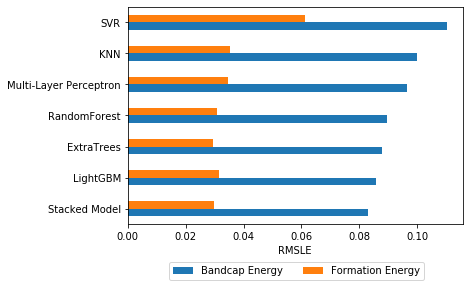

In [47]:
import pandas as pd
from matplotlib.pyplot import *

new = pd.read_csv("results.csv", delimiter=",").drop("Unnamed: 0", axis=1)

fig, ax = subplots()
new.sort_values(by="Bandcap Energy").plot.barh(x='Model', ax=ax)
ax.set_xlabel("RMSLE")
ax.set_ylabel("")
ax.legend( bbox_to_anchor=(0.9, -0.15), ncol=2)
plt.savefig("models.png", dpi=800,bbox_inches="tight")